## Zadanie 2

In [1]:
import pygad
import numpy
import pandas as pd
import time

In [2]:
# jaki zestaw przedmiotów ma największą wartość?
przedmiot = ['zegar', 'obraz-pejzaż', 'obraz-portret', 'radio',
            'laptop', 'lampka nocna', 'srebrne sztućce', 'porcelana',
            'figura z brązu', 'skórzana torebka', 'odkurzacz']
wartosc = [100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300]
waga = [7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15]
tabela = pd.DataFrame({'przedmiot': przedmiot, 'wartosc': wartosc, 'waga': waga})
tabela

,przedmiot,wartosc,waga
0,zegar,100,7
1,obraz-pejzaż,300,7
2,obraz-portret,200,6
3,radio,40,2
4,laptop,500,5
5,lampka nocna,70,6
6,srebrne sztućce,100,1
7,porcelana,250,3
8,figura z brązu,300,10
9,skórzana torebka,280,3


In [3]:
#limit wagi
n = 25

In [4]:
#definiujemy parametry plecaka
#przedmioty to liczby: 0 lub 1
gene_space = [0, 1]

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    sum_wart = numpy.sum(solution * wartosc)
    sum_wag = numpy.sum(solution * waga)
    if sum_wag > n:
        return 0
    else:
        return sum_wart

fitness_function = fitness_func

#ile plecaków w populacji
#ile przedmiotów ma plecak
sol_per_pop = 10
num_genes = len(wartosc)

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent przedmiotów?
#trzeba pamietac ile przedmiotów ma plecak
mutation_type = "random"
mutation_percent_genes = 10 # czyli 1 przedmiot się zmieni

In [5]:
czasy = []
for i in range(10):
    start = time.time()

    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria="reach_1600")

    #uruchomienie algorytmu
    ga_instance.run()
    
    end = time.time()
    czas = end - start
    print(czas)
    czasy.append(czas)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Parameters of the best solution : {solution}".format(solution=solution))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print(czasy, numpy.mean(czasy))

0.0025675296783447266
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
0.007816076278686523
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
0.007977724075317383
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
0.002992391586303711
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
0.0020215511322021484
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
0.001965761184692383
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
0.00307464599609375
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
0.009973287582397461
Parameters of the best solution : [0. 1.

In [6]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))

Number of generations passed is : 22


In [7]:
#podsumowanie: najlepsze znalezione rozwiazanie (plecak + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0


In [8]:
#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(wartosc*solution) # ma wyjść 1630
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Predicted output based on the best solution : 1630.0


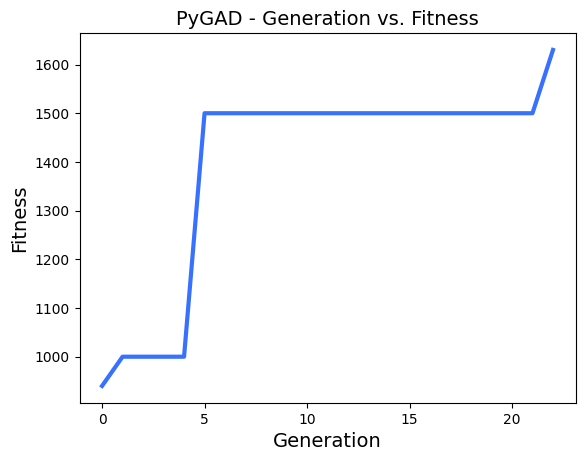

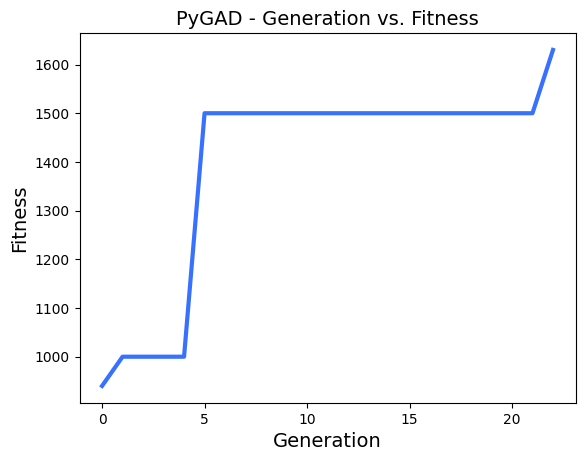

In [9]:
#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()